In [1]:
import numpy as np

import pandas as pd

import xarray as xr

from affine import Affine

import matplotlib.pyplot as plt

import rasterio 

from rasterio.plot import show

from glob import glob

import rioxarray

In [2]:
from scipy import stats
import dask.array as da
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.graphics.gofplots import qqplot_2samples


In [3]:
# start a Dask client
from dask.distributed import Client

client = Client()
client


C:\Users\qijue.chen\AppData\Local\anaconda3\lib\site-packages\distributed\node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56696 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:56696/status,
Dashboard: http://127.0.0.1:56696/status,Workers: 4
Total threads: 12,Total memory: 31.72 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56697,Workers: 4
Dashboard: http://127.0.0.1:56696/status,Total threads: 12
Started: Just now,Total memory: 31.72 GiB
Comm: tcp://127.0.0.1:56737,Total threads: 3
Dashboard: http://127.0.0.1:56738/status,Memory: 7.93 GiB
Nanny: tcp://127.0.0.1:56700,


In [4]:

da1 = rasterio.open(r"C:\Users\qijue.chen\Downloads\2D_model_output_sample_data\2D_model_output_sample_data\terrain\Terrain_Addison_M03.tif",masked=True)
#transform = Affine.from_gdal(*da.attrs['transform']) # this is important to retain the geographic attributes from the file
da1

<open DatasetReader name='C:/Users/qijue.chen/Downloads/2D_model_output_sample_data/2D_model_output_sample_data/terrain/Terrain_Addison_M03.tif' mode='r'>

In [5]:
da1.read_masks(1)

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

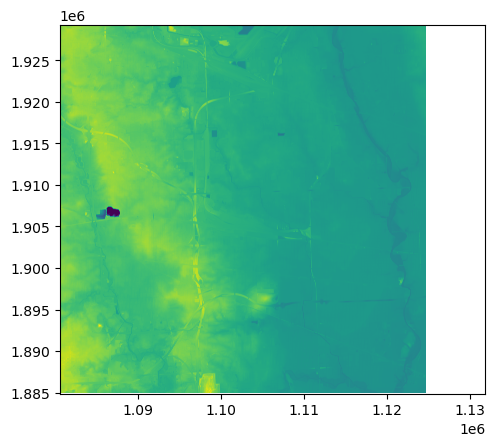

<Axes: >

In [6]:
show(da1)

In [7]:
da1 = xr.open_rasterio(r"C:\Users\qijue.chen\Downloads\2D_model_output_sample_data\2D_model_output_sample_data\wsel_grids\WSE_Addison_M03_H04_E4001.tif")
transform = Affine.from_gdal(*da1.attrs['transform']) # this is important to retain the geographic attributes from the file
print(da1)

<xarray.DataArray (band: 1, y: 8899, x: 10249)>
[91205851 values with dtype=float32]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 1.929e+06 1.929e+06 1.929e+06 ... 1.885e+06 1.885e+06
  * x        (x) float64 1.081e+06 1.081e+06 1.081e+06 ... 1.132e+06 1.132e+06
Attributes:
    transform:                 (5.0, 0.0, 1080548.6459105245, 0.0, -5.0, 1929...
    crs:                       +init=epsg:3435
    res:                       (5.0, 5.0)
    is_tiled:                  1
    nodatavals:                (-9999.0,)
    scales:                    (1.0,)
    offsets:                   (0.0,)
    AREA_OR_POINT:             Area
    HISTOGRAM:                 706|65|79|98|144|70|55|300|37|40|42|42|69|84|8...
    TIFFTAG_ARTIST:            HEC-RAS
    TIFFTAG_IMAGEDESCRIPTION:  WSE (Max)


C:\Users\qijue.chen\AppData\Local\Temp\ipykernel_5096\936586548.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  da1 = xr.open_rasterio(r"C:\Users\qijue.chen\Downloads\2D_model_output_sample_data\2D_model_output_sample_data\wsel_grids\WSE_Addison_M03_H04_E4001.tif")


In [8]:
da1_ = np.ma.masked_array(da1, da1 == -9999.0)

In [9]:
# ds = xr.DataArray.to_dataset(da1, name = "wse dataset")
# ds['band']
band = xr.DataArray.to_numpy(da1)
print(band)

[[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  ...
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]]]


In [10]:
print(da1['band'])

<xarray.DataArray 'band' (band: 1)>
array([1])
Coordinates:
  * band     (band) int32 1


In [11]:
#res = xr.apply_ufunc(weibull_fit, da1, input_core_dims=[["band"]], kwargs={'exceed_p': exceedance_p}, dask = 'allowed', vectorize = True)

In [12]:
print(type(da1))
print("the minimum raster value is: ", np.nanmin(da1.values))
print("the maximum raster value is: ", np.nanmax(da1.values))

<class 'xarray.core.dataarray.DataArray'>
the minimum raster value is:  -9999.0
the maximum raster value is:  673.82513


In [15]:
# Path of the folder containing the terrain .tiff files
IMG_PATH = 'C:/Users/qijue.chen/Downloads/2D_model_output_sample_data/2D_model_output_sample_data/terrain/Terrain_Addison_M03.tif'

terrain = rioxarray.open_rasterio(IMG_PATH, chunks = (1,128,128), masked = True)

#slice xds - may need to compute 
terrain = terrain[:,499,499]

# Stack bands into a single DataArray
terrain

<xarray.DataArray (band: 1)>
dask.array<getitem, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int32 1
    x            float64 1.083e+06
    y            float64 1.927e+06
    spatial_ref  int32 0
Attributes: (12/19)
    AREA_OR_POINT:             Area
    HISTOGRAM:                 42941|1342|609|551|466|413|411|518|461|500|424...
    TIFFTAG_ARTIST:            HEC-RAS
    TIFFTAG_IMAGEDESCRIPTION:  Terrain Raster
    TIFFTAG_SOFTWARE:          HEC-RAS
    DECIMAL_PRECISION:         ThirtySeconds
    ...                        ...
    STATISTICS_SKIPFACTORY:    1
    STATISTICS_STDDEV:         26.292600539339
    TYPE:                      Elevation
    UNITS:                     Feet
    scale_factor:              1.0
    add_offset:                0.0

In [16]:
# Path of the folder containing the .tiff files
IMG_PATH = 'C:/Users/qijue.chen/Downloads/2D_model_output_sample_data/2D_model_output_sample_data/wsel_grids/'

# List of .tiff files
wse_layers = glob(f"{IMG_PATH}*.tif")
wse_layers.sort() # sorted list
        
ls_wse_layers = [] # list filled with the first layer of each file
for l in wse_layers:
    xds = rioxarray.open_rasterio(l, chunks = (1,128,128), masked = True)
    #slice xds - may need to compute 
    xds = xds[:,499,499]
    ls_wse_layers.append(xds-terrain) # index 0 corresponds to the first band of each file

# Stack bands into a single DataArray
print(type(ls_wse_layers[0]))

# change the lib to rioxarray-rasterio
# chunk parameter 128*128
# ***check xds shape 


<class 'xarray.core.dataarray.DataArray'>


In [17]:
print(ls_wse_layers[0])

<xarray.DataArray (band: 1)>
dask.array<sub, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int32 1
    x            float64 1.083e+06
    y            float64 1.927e+06
    spatial_ref  int32 0


In [18]:
ds = ls_wse_layers[0].to_dataset(name = "wse1")

idx = 1
for i in range(idx,len(ls_wse_layers)):
    var_name = "wse"+ str(i+1)
    ds[var_name] = ls_wse_layers[i]
    
ds


<xarray.Dataset>
Dimensions:      (band: 1)
Coordinates:
  * band         (band) int32 1
    x            float64 1.083e+06
    y            float64 1.927e+06
    spatial_ref  int32 0
Data variables: (12/96)
    wse1         (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse2         (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse3         (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse4         (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse5         (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse6         (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...           ...
    wse91        (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse92        (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse93        (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse94        (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse95        (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wse96        (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [19]:
# ds = ds.sel('band')
# ds = ds.drop_vars('spatial_ref')
# ds

In [20]:

index_list = range(1, 97)

ds = xr.concat(
    [ds[f"wse{i}"] for i in range(1, len(index_list) + 1)],
    dim=pd.Index(index_list, name="scenario"),
).to_dataset(name="all_runs")




In [21]:
ds['all_runs']

<xarray.DataArray 'all_runs' (scenario: 96, band: 1)>
dask.array<concatenate, shape=(96, 1), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int32 1
    x            float64 1.083e+06
    y            float64 1.927e+06
    spatial_ref  int32 0
  * scenario     (scenario) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96

In [22]:
#ds = ds.drop_vars('scenario')
#ds_test = ds.sel(scenario = 1)
ds_test = ds.sel(band = 1)

In [23]:
ds_test

<xarray.Dataset>
Dimensions:      (scenario: 96)
Coordinates:
    band         int32 1
    x            float64 1.083e+06
    y            float64 1.927e+06
    spatial_ref  int32 0
  * scenario     (scenario) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
Data variables:
    all_runs     (scenario) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [46]:
da_test = ds_test.to_array() 
da_test = da_test.sel(variable = 'all_runs')
da_test = np.nan_to_num(da_test,nan = 0.000001)
da_test

array([9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       5.27343750e-02, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       1.23291016e-02, 9.99999997e-07, 9.99999997e-07, 5.31005859e-03,
       1.08093262e-01, 9.99999997e-07, 9.99999997e-07, 2.20336914e-02,
       6.88476562e-02, 9.99999997e-07, 9.99999997e-07, 6.82983398e-02,
      

In [25]:
print(da_test.shape)
print(type(da_test))

(96,)
<class 'numpy.ndarray'>


In [195]:
da_test = ds_test.to_array() 
da_test = da_test.sel(variable = 'all_runs')
da_test = np.nan_to_num(da_test,nan = np.mean(da_test))
da_test

array([0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.18849218, 0.18849218, 0.18849218, 0.18849218, 0.18849218,
       0.05273438, 0.18849218, 0.18849218, 0.18849218, 0.0123291 ,
       0.18849218, 0.18849218, 0.00531006, 0.10809326, 0.18849218,
       0.18849218, 0.02203369, 0.06884766, 0.18849218, 0.18849218,
       0.06829834, 0.19268799, 0.18849218, 0.18849218, 0.10919189,
       0.15045166, 0.18849218, 0.18849218, 0.14801025, 0.29138184,
       0.02154541, 0.00836182, 0.1661377 , 0.24560547, 0.05285645,
       0.02886963, 0.20062256, 0.3774414 , 0.08508301, 0.07104

In [40]:
da_test = ds_test.to_array() 
da_test = da_test.sel(variable = 'all_runs')
da_test = np.nan_to_num(da_test,nan = 0)
da_test

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05273438, 0.        , 0.        , 0.        , 0.0123291 ,
       0.        , 0.        , 0.00531006, 0.10809326, 0.        ,
       0.        , 0.02203369, 0.06884766, 0.        , 0.        ,
       0.06829834, 0.19268799, 0.        , 0.        , 0.10919189,
       0.15045166, 0.        , 0.        , 0.14801025, 0.29138184,
       0.02154541, 0.00836182, 0.1661377 , 0.24560547, 0.05285645,
       0.02886963, 0.20062256, 0.3774414 , 0.08508301, 0.07104

# Weibull Fit Visualization

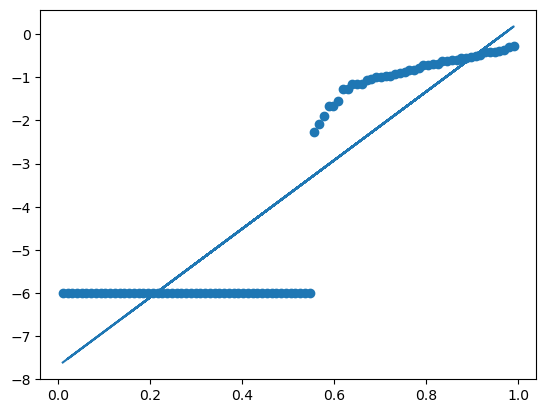

In [39]:
def weibull_fit(data: np.ndarray):
    # if np.isnan(data).any():
    #     return (np.nan, np.nan)
    ranks = data.argsort().argsort()+1
    probs = ranks/(len(ranks)+1)
    slope, intercept = np.polyfit(probs, np.log10(data), 1)
    x = np.linspace(probs.min(), probs.max(), 100)
    plt.scatter(probs, np.log10(data))
    plt.plot(probs, slope*probs+intercept) 
    #plt.plot(x, 10**(slope*x+intercept))
    plt.show()


weibull_fit(da_test)

# GEV Fit Visualization

In [47]:
from scipy.stats import genextreme as gev

In [48]:
# fit an GEV distrubtion to every stream's annual maximum flows.

def fit_gev(data: np.ndarray):
    # Fit an GEV distribtion to a 1-dimensional NumPy array.
    # Returns fit parameters: (shape, loc, scale)
    # If any of the 1D array values are NaN, returns (None, None, None)
    if np.isnan(data).any():
        return (np.nan, np.nan, np.nan, np.nan) 
    shape, loc, scale = gev.fit(data)
    cdf = gev.cdf(data,shape,scale,loc)
    #p_val = stats.kstest(data, gev.cdf, args = [shape, loc, scale])
    return [shape, loc, scale]#, p_val[1]]

shape, loc, scale = da.apply_along_axis(fit_gev, 0, da_test)

C:\Users\qijue.chen\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:407: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


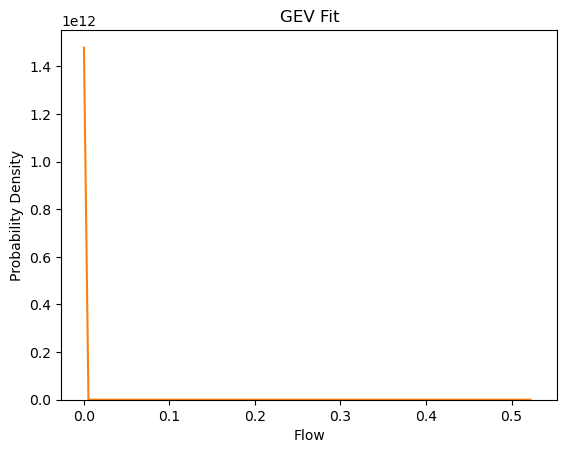

In [49]:
plt.hist(da_test, density = True)
x = np.arange(np.min(da_test), np.max(da_test), (-np.min(da_test) + np.max(da_test))/100)
f_x = gev.pdf(x,shape, loc, scale)
plt.plot(x, f_x)
plt.title("GEV Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Log Pearson III Fit Visualization

In [50]:
def fit_pearson3_log(data: np.ndarray):
    # Fit a log LP-III distribtion to a 1-dimensional NumPy array.
    # Returns fit parameters: (skew, loc, scale)
    # If any of the 1D array values are NaN, returns (None, None, None)
    data[data == 0] = np.nan
    if np.isnan(data).any():
        return (np.nan, np.nan, np.nan,np.nan)
    skew, loc, scale = stats.pearson3.fit(np.log(data))
   # p_val = stats.kstest(np.log(data), stats.pearson3.cdf, args = [skew,loc,scale])
    return [skew, loc, scale] #, p_val[1]]

skew, loc, scale = da.apply_along_axis(fit_pearson3_log, 0, da_test)


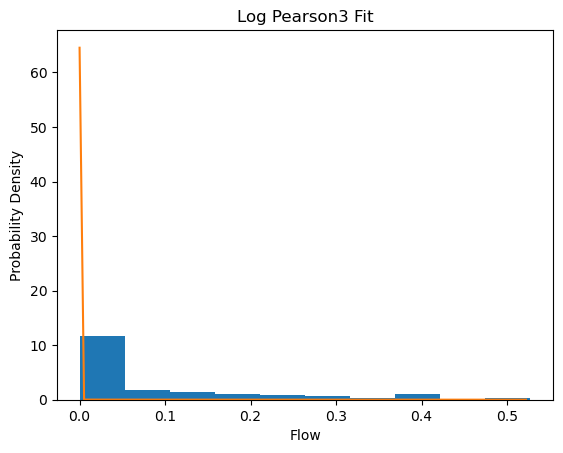

In [51]:
plt.hist(da_test, density = True)
x = np.arange(np.min(da_test), np.max(da_test), (-np.min(da_test) + np.max(da_test))/100)
f_x = stats.pearson3.pdf(np.log(x),skew, loc, scale)
plt.plot(x, f_x)
plt.title("Log Pearson3 Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Gumbel Fit Visualization

In [163]:
def fit_gumbel(data: np.ndarray):
    loc, scale = stats.gumbel_r.fit(data)
    
    return [loc, scale]

loc, scale = da.apply_along_axis(fit_gumbel, 0, da_test)


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

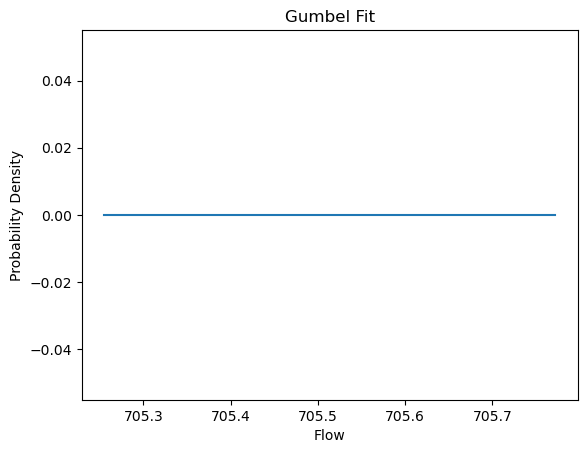

In [164]:
#plt.hist(da_test, density = True)
x = np.arange(np.min(da_test), np.max(da_test), (-np.min(da_test) + np.max(da_test))/100)
f_x = stats.gumbel_r.pdf(x, loc, scale)
plt.plot(x, f_x)
plt.title("Gumbel Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Apply Weights

In [52]:
import json
  
# Opening JSON file
f = open('Addison_M03_H04_Weights.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Closing file
f.close()

In [196]:
weights = list(data.values()) # we don't need to query weights based on file names here due to the sorting Python / whoever prepared the data; future efforts may be needed to add code for dict query 
weights = np.array(weights)
print(type(weights))

<class 'numpy.ndarray'>


In [197]:
count = np.round(weights*10**5)
count = np.int_(count)

In [198]:
full_values = np.repeat(da_test, count)
full_values

array([0.18849218, 0.18849218, 0.18849218, ..., 0.19140625, 0.38000488,
       0.38000488], dtype=float32)

# Pearson III

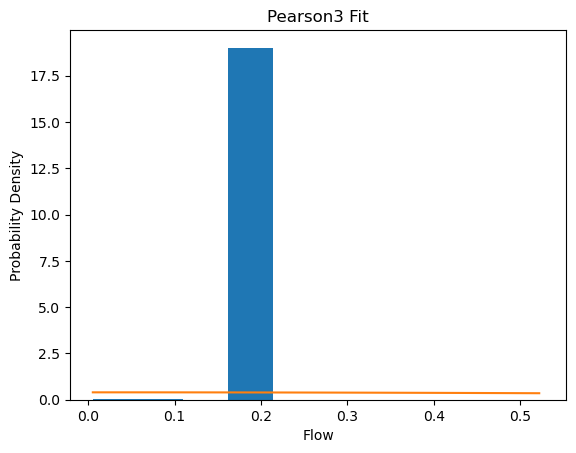

In [199]:
plt.hist(full_values, density = True, bins = 10)

skew,loc,scale = stats.pearson3.fit(full_values)
x = np.arange(np.min(full_values), np.max(full_values), (-np.min(full_values) + np.max(full_values))/100)
f_x = stats.pearson3.pdf(x, skew)
plt.plot(x, f_x)
plt.title("Pearson3 Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Gumbel

In [200]:
def fit_gumbel(data: np.ndarray):
    loc, scale = stats.gumbel_r.fit(data)
    
    return [loc, scale]

loc, scale = fit_gumbel(full_values)

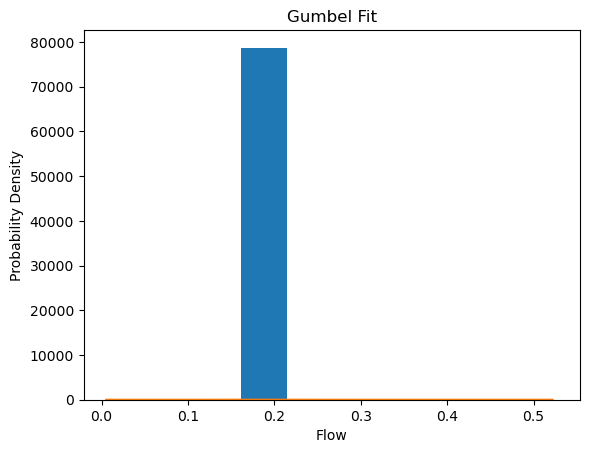

In [201]:
plt.hist(full_values, bins = 10)
x = np.arange(np.min(full_values), np.max(full_values), (-np.min(full_values) + np.max(full_values))/100)
f_x = stats.gumbel_r.pdf(x, loc, scale)
plt.plot(x, f_x)
plt.title("Gumbel Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Weibull

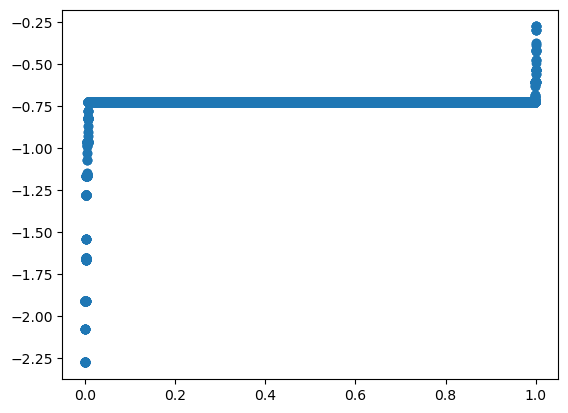

In [202]:
weibull_fit(full_values)

# GEV Fit

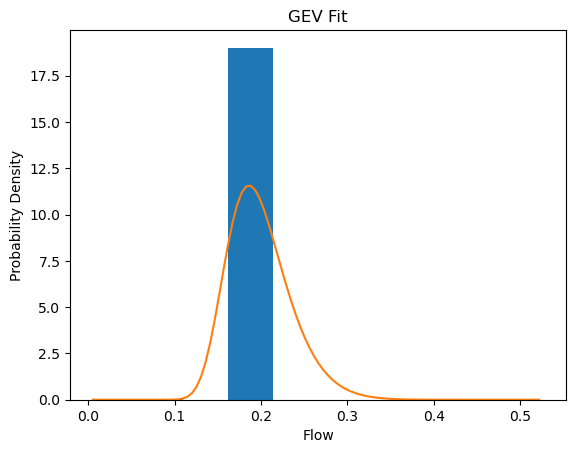

In [203]:
shape, loc, scale = fit_gev(full_values)
plt.hist(full_values, density = True)
x = np.arange(np.min(full_values), np.max(full_values), (-np.min(full_values) + np.max(full_values))/100)
f_x = gev.pdf(x,shape, loc, scale)
plt.plot(x, f_x)
plt.title("GEV Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Log Pearson III

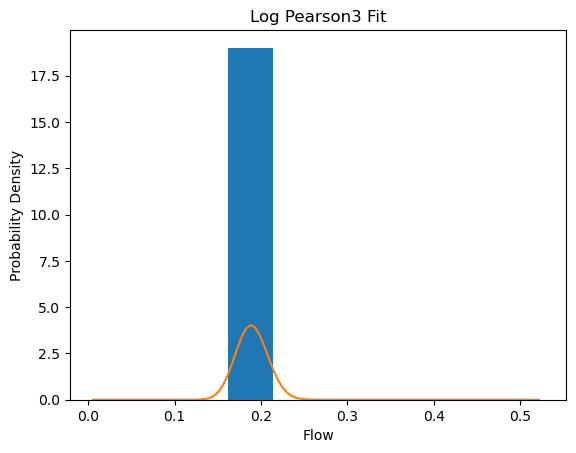

In [204]:
skew, loc, scale = fit_pearson3_log(full_values)
plt.hist(full_values, density = True)
x = np.arange(np.min(full_values), np.max(full_values), (-np.min(full_values) + np.max(full_values))/100)
f_x = stats.pearson3.pdf(np.log(x),skew, loc, scale)
plt.plot(x, f_x)
plt.title("Log Pearson3 Fit")    
plt.xlabel("Flow")
plt.ylabel("Probability Density")
plt.show()

# Pearson III Distribution Calcultion - Method of Moments - in Progress
references: https://mathworld.wolfram.com/PearsonTypeIIIDistribution.html

In [85]:
expected_mean = 10**5*np.dot(weights, da_test)/len(da_test)
print(expected_mean)
print(len(da_test))

0.6680488231418757
96


In [160]:
expected_var = np.var(np.multiply(weights*10**5,da_test))
expected_var

2.341759572306118

In [161]:
expected_std = np.sqrt(expected_var)
expected_std

1.530280880200141

In [130]:
expected_skew = stats.skew(np.multiply(weights,da_test))
expected_skew

3.917798317982342

In [162]:
# param = stats.pearson3.fit(np.multiply(weights*10**5,da_test)) # distribution fitting

# # fitted distribution
# pdf_fitted = stats.pearson3.pdf(da_test,expected_skew, loc=param[-2], scale=param[-1])
# # original distribution
# #pdf = norm.pdf(x)
# param

(2.7141977569512146, 0.3885667533572706, 0.5273058958441487)

In [165]:
from math import gamma as GammaFN
from scipy.optimize import brentq as root

def fitWeibull(mean, std, skew):
#derivation from https://www.real-statistics.com/distribution-fitting/method-of-moments/method-of-moments-weibull/
    kappa = root((lambda k: np.log(GammaFN(1 + 2/k)) - 2*np.log(GammaFN(1 + 1/k)) - np.log(std**2+mean**2) + 2*np.log(mean)), 0.02, 10)
    xi = 0
    alpha = mean / GammaFN(1+1/kappa)
    return kappa, xi, alpha #already correpsond to shape, loc, scale

param_weibull = fitWeibull(expected_mean, expected_std, expected_skew)